# Math+Econ+Code Prerequisites 3: Numerical Optimization

References: 
* Iterative Solution of Nonlinear Equations in Several Variables (Ortega Rheinboldt, 1970) (Great book but a bit inaccessible)
* Microeconometrics, methods and Applications Chapter 10 (Cameron Trivedi) (More accessible but focused on econometrics)


Numerical Optimization is a large and developed field, we cannot cover everything and even every type of method in two hours. Therefore we will simply introduce the topic, and focus on approximation methods for convex optimization and econometrics.

Why do we need numerical optimization ? Sometimes, analytical methods based on first and second-order conditions are not sufficient. The problem can be too large to be computed by hand in a human life, or simply it cannot be solved analytically. Numerical methods exist for many tasks (computing the inverse of a matrix, find the maximum of a function, find its solutions, etc.) We will explore some of them and code them by hand, but in many cases an optimized implementation of the algorithms we will describe exists in Python.

Speaking of algorithms, often several have been invented to solve the same problem, which differ in speed, efficiency...

## Concepts:

* Function: $f(x)$, $x \in \mathbb{R}^n$
* Gradient: $\nabla f(x_k) = \Big(\frac{\partial f}{\partial x_1} \Big|_{x_k}, \frac{\partial f}{\partial x_2} \Big|_{x_k}, ..., \frac{\partial f}{\partial x_n} \Big|_{x_k}\Big)$
* Search Direction: in what direction should we look for in order to find a better $x_k$ ?
* Step size: there is a trade-off between going fast with a large step, but risk missing the optimum, or use smaller steps but risk taking ages to find the solution
* And ending criteria: when is "close enough" good enough ?


In [1]:
def fconvex(x1, x2):
    return x1**(2) + x2**(2)

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

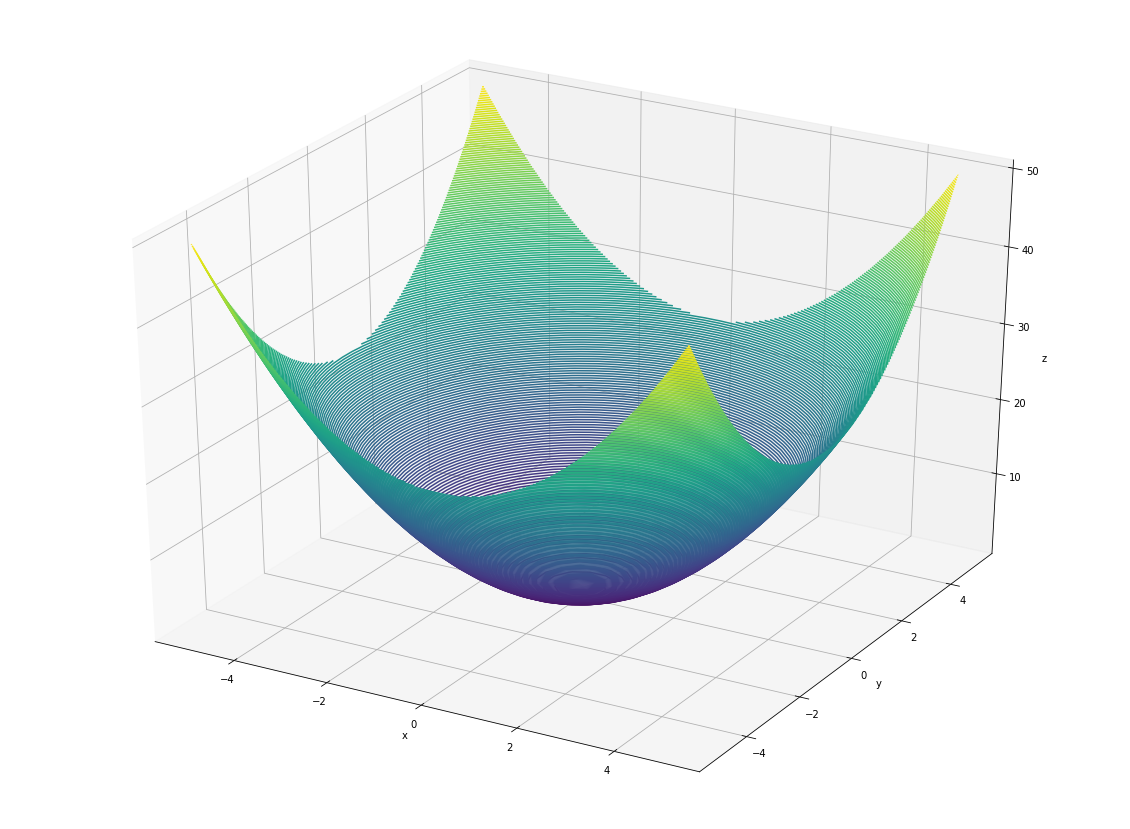

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax.contour3D(X, Y, Z, 200, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [7]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax2.contour3D(X, Y, Z, 100, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Seen from above');

ax2.view_init(90, 0)

## Gradient Descent

This first and import method can be used to find the optimum of a function. In its simplest version, it can be used on globally convex (or concave) functions such as the one depicted above.


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/800px-Gradient_descent.svg.png width="200">


The conceptual formula for the Gradient Descent algorithm is the following:

\begin{align}
x_{k+1} = x_k + \lambda_k A_k g_k
\end{align}

Where:
* $g_k$ is the gradient of the function evaluated at $x_k: \nabla f(x) \Big|_{x_k}$. In case it is not clear, $g_k$ is a vector, of size $n$.
* $A_k$ is a (n x n) matrix that depends on $x_k$. If we use the Newton-Raphson method, this matrix is set to $A_k = -(H_k)^{-1}$, where $H$ is the Hessian that we studied in the first session.
* $\lambda_k$ is the size of the step we are taking

So, we need partial derivatives. How do we compute these ?
- Analytical solution: faster, but you need to be able to compute them
- Numerical solution: approximate the partial derivative: $\frac{\partial f}{\partial x_j} \approx \frac{f(x + h \cdot e_j) \hspace{2pt} - \hspace{2pt}  f(x - h \cdot e_j)}{2h}$, where $h$ is small and $e_j = (0,..., 0, 1, 0, ..., 0)'$ is a vector of zeros with value 1 at the index of the partial derivative you are taking.

Let's go back to our function $f(x_1, x_2) = x_1^2 + x_2^2$, here the derivatives are extremely easy to compute by hand. We write them under matrix form (numpy array).

In [8]:
def f(x):
    return x[0]**(2) + x[1]**(2)

def g(x):
    return np.array([2*x[0], 2*x[1]])


def H(x):
    return np.array([[2, 0],
                    [0, 2]])

In [9]:
#Starting point: (25, 12)
λ = 0.2

x_k1 = np.array([25, 12])
g_k1 = g(x_k1)
A_k1 = -np.linalg.inv(H(x_k1))

print(g_k1)

[50 24]


In [10]:
x_k2 = x_k1 + λ* A_k1@g_k1

In [11]:
g(x_k2)

array([40. , 19.2])

In [12]:
# As you have seen, since the function is simple, H is the same for every iteration, we will not re-compute it.
g_k2 = g(x_k2)
x_k3 = x_k2 + λ* A_k1@g_k2

In [13]:
g(x_k3) #closer to 0, but still not there. Let's automatize this process

array([32.  , 15.36])

In [14]:
def gradient_descent(x_1, λ=0.5):
    error = 1000
    tol = 1e-8
    x_hist = []
    
    
    x = x_1
    while error > tol:
        g_k = g(x)
        A_k = -np.linalg.inv(H(x))
        x = x + λ*A_k@g_k
        x_hist.append(x)
        
        error = max(abs(g_k))
    
    x_hist_np = np.empty((len(x_hist), x_1.shape[0]))
    for iter_index in range(len(x_hist)):
        x_hist_np[iter_index, :] = x_hist[iter_index]
    return x, x_hist_np

In [15]:
sol = gradient_descent(np.array([4, 4]))[0]
sol

array([1.86264515e-09, 1.86264515e-09])

In [16]:
x_hist_1 = gradient_descent(np.array([-150, -150]))[1]

In [17]:
fig3 = plt.figure()
ax3 = plt.axes(projection='3d')

x = np.linspace(-100, 100, 300)
y = np.linspace(-100, 100, 300)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax3.contour3D(X, Y, Z, 250, cmap='cividis', alpha=0.3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')


xdata = x_hist_1[:, 0]
ydata = x_hist_1[:, 1]
zdata = fconvex(xdata, ydata)
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cividis')
ax3.plot3D(xdata, ydata, zdata, 'red', lw=5)
ax3.view_init(40, 20);

Here, we have coded our own Gradient Descent, using its mathematical formulation. We could use another method and code it by hand, and while this is certainly quite nice, we would reinvent the wheel doing so. An easier solution is to use the code already written and optimized by other people, that is present in the library Scipy.

In [18]:
from scipy.optimize import minimize
#BFGS is a 'quasi-Newton' method, that uses an approximation of the Hessian instead of computing it exactly as we have done before.

minimize(f, x0=[12, 12], method="BFGS")

      fun: 1.1737959695252328e-12
 hess_inv: array([[ 0.74999998, -0.25000002],
       [-0.25000002,  0.74999998]])
      jac: array([1.54708651e-06, 1.54708651e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([7.66092674e-07, 7.66092674e-07])

The Gradient Descent we have coded manually here is great, but it requires an explicit expression for the Hessian. While it wasn't an issue with a simple function, it can lead to issues, because derivatives are computationally expensive, be it for the human who derives them or for the computer. Most methods developed attempt to alleviate this issue by only computing the Gradient (first degree derivative) and approximating the Hessian by another method. In particular, the BFGS method on which the **minimize** function relies approximates the Hessian by recursion.

## Coordinate Descent:

Instead of looking at all variables, why not look at them one after another ? This is called coordinate gradient descent. As you will see, there is no need to use the Hessian here either. Coordinate descent is a simple method, perhaps too simple. Typically, it risks not converging to a solution if the objective function is not smooth.


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Coordinate_descent.svg/1024px-Coordinate_descent.svg.png width="500">

In [19]:
def coordinate_descent(x_1, λ=0.5):
    error = 1000
    tol = 1e-8
    x_hist = []
    
    
    x = x_1
    coord = 0
    
    while error > tol:
        
        
        gradient_k = g(x)
        g_basis = np.zeros(x_1.shape[0])
        g_basis[coord] = gradient_k[coord]
        
        x = x - λ*g_basis
        x_hist.append(x)
        error = max(abs(gradient_k))
        
        if coord < x_1.shape[0]-1: #go to the next coordinate
            coord+=1
        else:
            coord=0 #if we're at the last coordinate already, go back to the first coordinate
            
    
    x_hist_np = np.empty((len(x_hist), x_1.shape[0]))
    for iter_index in range(len(x_hist)):
        x_hist_np[iter_index, :] = x_hist[iter_index]
    return x, x_hist_np

In [20]:
x_hist_2 = coordinate_descent(np.array([-100, -100]), λ=0.2)[1]

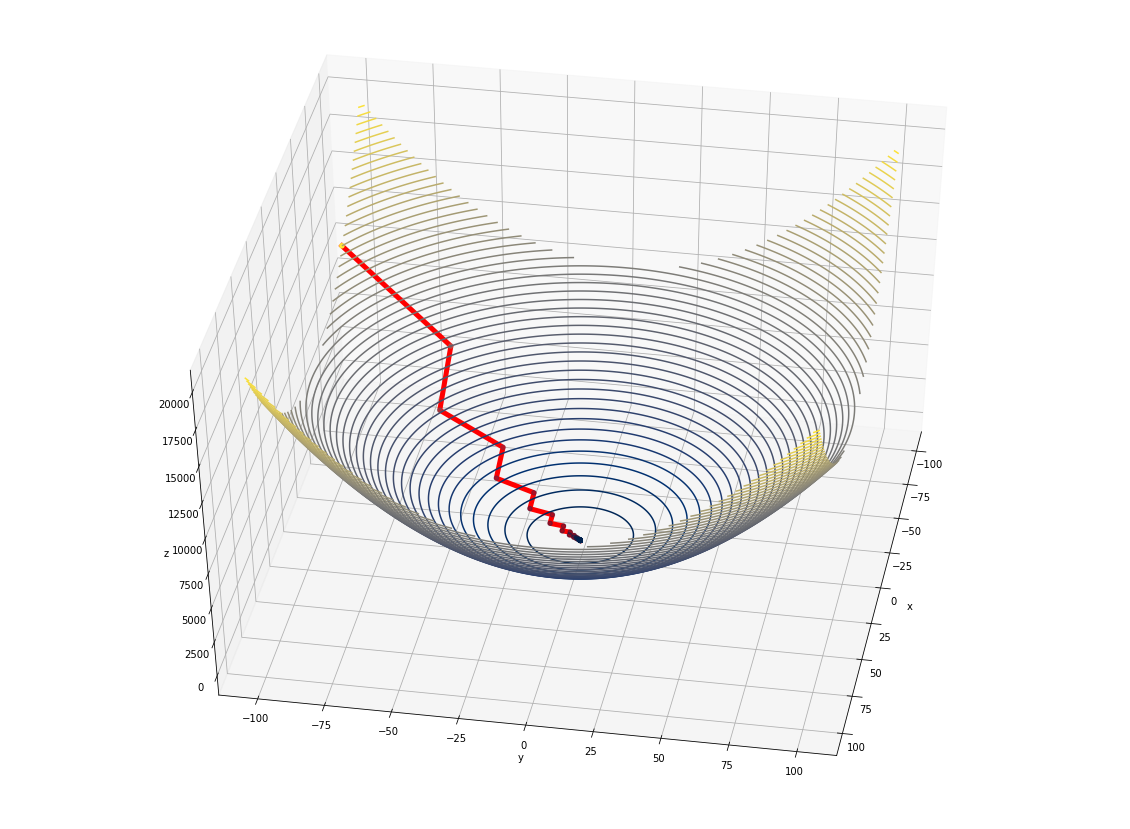

In [21]:
fig4 = plt.figure()
ax4 = plt.axes(projection='3d')

x = np.linspace(-100, 100, 300)
y = np.linspace(-100, 100, 300)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax4.contour3D(X, Y, Z, 50, cmap='cividis')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')


xdata = x_hist_2[:, 0]
ydata = x_hist_2[:, 1]
zdata = fconvex(xdata, ydata)
ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cividis')
ax4.plot3D(xdata, ydata, zdata, 'red', lw=5)
ax4.view_init(45, 10);

## Dynamic Numerical Optimization

The last topic of today is a complement to the Dynamic Programming session. We finished last session on infinite horizon dynamic programming, for which we formulated the problem as follows:
\begin{align}
V(x) = \max f(x, u) + \beta V(x')
\end{align}

Now that we have introduced numerical methods, we are ready to solve this problem, and we are going to focus on an economics problem: consumption.

Consider you want to maximize the following problem: 

\begin{align}
\max_{\{c_t\}_{t=0}^{\infty}}  & \, \sum_{t=0}^{\infty} \beta^t u(c_t) \\
s.t: & \ k_{t+1} + c_{t} = f(k_t) \\
& \ k_0 \hspace{5pt} \text{given}
\end{align}

At every period, the agents "looks" at his stock of capital, and decides how much to consume based on this. So, the "state" is capital $k$. The problem can be written recursively as follows:

\begin{align}
V(k_0) = \max_{\{0 < k_1 < f(k_0)\}_{t=0}^{\infty}} \{ u(f(k_0) - k_1) + \beta V(k_1)\}
\end{align}

Since the problem is infinite horizon, the solution (if it exists) is stationary: what is valid for some $k_0$ and $k_1$ (taken arbitrarily as a starting point between $-\infty$ and $+\infty$, must be valid for any $k$ and $k'$. Also, to have a specific functional form for $f$ and $u$ in mind, we rewrite the problem:

\begin{align}
V(k) = \max_{\{0 < k' < A(k^\alpha)\}_{t=0}^{\infty}} \{ \log(Ak^\alpha) - k') + \beta V(k')\}
\end{align}


In [39]:
kmax = 30
precision=200

kgrid = np.linspace(1, kmax, precision)
gk = np.linspace(1, kmax, precision)
Vk0 = np.ones(precision)

A=10
α=0.5
β=0.9

norm = 1e5
tol = 1e-8
maxiter=1000
n_iter=0


Vk = Vk0
while n_iter < maxiter and norm > tol:
    value_array = np.empty((precision, precision))
    
    for iprim, kprim in enumerate(kgrid):
        for i, k in enumerate(kgrid):
            c = A*(k**α) - kprim
            if c > 0:
                value_array[i, iprim] = np.log(c) + β*Vk[iprim] 
            else:
                value_array[i, iprim] = -np.inf
                
    Vkprim = np.empty(precision)
    for row in range(value_array.shape[1]):
        gk[row] = kgrid[int(np.argmax(value_array[row, :]))]
        Vkprim[row] = np.max(value_array[row, :])
    
    norm = np.max(np.abs(Vkprim - Vk))
    Vk = Vkprim
    
    n_iter += 1
    print("iteration: ", n_iter, " error: ", norm)

iteration:  1  error:  3.884757641783117
iteration:  2  error:  2.882083935801659
iteration:  3  error:  2.5089908990608283
iteration:  4  error:  2.2329620751402928
iteration:  5  error:  2.000399429882627
iteration:  6  error:  1.7965668564188917
iteration:  7  error:  1.615285261725461
iteration:  8  error:  1.4530296087434174
iteration:  9  error:  1.307415874014488
iteration:  10  error:  1.1765199082665276
iteration:  11  error:  1.058803635426532
iteration:  12  error:  0.9528926646095286
iteration:  13  error:  0.8575913772309605
iteration:  14  error:  0.7718319480552651
iteration:  15  error:  0.694641689662955
iteration:  16  error:  0.6251775206966599
iteration:  17  error:  0.5626597686269932
iteration:  18  error:  0.506393791764296
iteration:  19  error:  0.455754412587865
iteration:  20  error:  0.4101789713290813
iteration:  21  error:  0.36916107419617816
iteration:  22  error:  0.33224496677656035
iteration:  23  error:  0.29902047009890254
iteration:  24  error:  0.

iteration:  182  error:  1.5858432789173094e-08
iteration:  183  error:  1.427259022079852e-08
iteration:  184  error:  1.2845333685618243e-08
iteration:  185  error:  1.1560800317056419e-08
iteration:  186  error:  1.0404725969692663e-08
iteration:  187  error:  9.364253372723397e-09


In [40]:
kstar = kgrid[np.argmin(np.abs(gk - kgrid))]

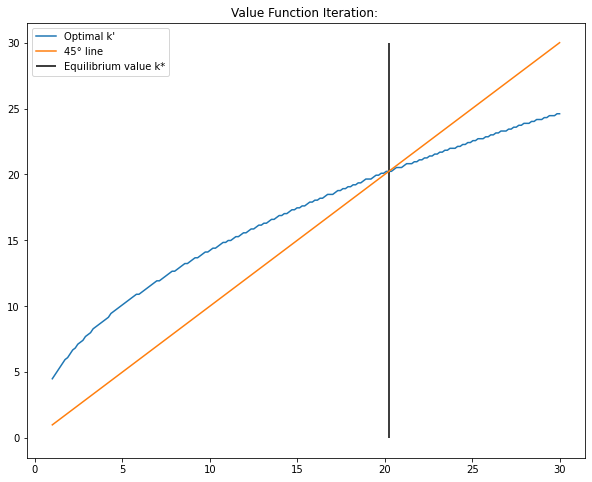

In [41]:
plt.rcParams["figure.figsize"] = (10, 8)

plt.plot(kgrid, gk, label="Optimal k'")
plt.plot(kgrid, kgrid, label="45° line")
plt.vlines(kstar, ymin=0, ymax=30, label="Equilibrium value k*")

plt.title("Value Function Iteration: ")
plt.legend()
plt.show()